<center><h1>Técnicas de Inteligencia Artificial</header1></center>

Presentado por: Nombres Apellidos  <br>
Fecha: DD/MM/2022

# Importación de librerias necesarias

In [33]:
#Para esta actividad se importarán las siguientes librerías:
"""import numpy as np para trabajar con matrices y librerias de scipy para la regresión lineal y matplotlib para graficar
import matplotlib.pyplot as plt para graficar y se importará la librería pandas para trabajar con dataframes
""" 
import pandas as pd#para trabajar con dataframes y librería scipy para la regresión lineal
import matplotlib.pyplot as plt#para graficar y se importará la librería numpy para trabajar con matrices
from sklearn import linear_model # para la regresión lineal y librería scipy para la regresión lineal
from sklearn.metrics import r2_score # para calcular el coeficiente de determinación

## Cargar el Dataset

In [34]:
#Código para cargar el Dataset
"""Se cargará el dataset de la siguiente forma:"""
df = pd.read_csv('Realestate.csv')#se carga el dataset Realestate.csv
df # se imprime el dataset para verificar que se cargo correctamente

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


## Descripción de la fuente del Dataset

El dataset contiene información de 414 viviendas, dicho dataset contiene 8 atributos, incluida una característica de clase objetivo que indica el precio de la vivienda. El significado de cada columna en los datos es el siguiente:<br><br>
**X1 transaction date**: Continuo. Fecha en la que se negocia.<br>
**X2 house age**: Discreta. Edad de la casa.<br>
**X3 distance to the nearest MRT station**: Continuo. La estación de MRT más cercana.<br>
**X4 number of convenience stores**: Discreta. Número de tiendas de conveniencia.<br>
**X5 latitude**: Continuo. Latitud.<br>
**X6 longitude**: Continuo. Longitud.<br>
**Y house price of unit area**: Continuo. Precio de la vivienda por unidad de superficie.<br>

## Explique el problema a resolver. 
Se requiere crear un modelo de aprendizaje automático que permita predecir el precio adecuado de inmobiliarios en función de su ubicación. Para lo cual se utilizara el dataset (Real estate), el cual contiene 414 viviendas. Donde, la variable objetiva se denomina **”Y house price of unit area”** . Existen 7 variables de entrada llamadas: **No, X1 transaction date, X3 distance to the nearest MRT station,X4 number of convenience stores, X5 latitude, X6 longitude.**

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


## Número de instancias en total.

In [35]:
#Número de instancias en total
""" Se calcula el número de instancias en total del dataset"""
df.count() # se imprime el número de instancias en total del dataset

No                                        414
X1 transaction date                       414
X2 house age                              414
X3 distance to the nearest MRT station    414
X4 number of convenience stores           414
X5 latitude                               414
X6 longitude                              414
Y house price of unit area                414
dtype: int64

### Número de atributos de entrada, su significado y tipo

**X1 transaction date**: Continuo. Fecha en la que se negocia.<br>
**X2 house age**: Discreta. Edad de la casa.<br>
**X3 distance to the nearest MRT station**: Continuo. La estación de MRT más cercana.<br>
**X4 number of convenience stores**: Discreta. Número de tiendas de conveniencia.<br>
**X5 latitude**: Continuo. Latitud.<br>
**X6 longitude**: Continuo. Longitud.<br>

In [36]:
"""Se imprime el número de instancias en total del dataset para verificar que se cargo correctamente""" 
df.drop('Y house price of unit area', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


## Estadísticas de la variable objetivo.

In [37]:
""" Estadistica descriptiva del dataset de Y house price of unit area"""
df[['Y house price of unit area']].describe()

,Y house price of unit area
count,414.000000
mean,37.980193
std,13.606488
min,7.600000
25%,27.700000
50%,38.450000
75%,46.600000
max,117.500000


## Estadísticas los atributos en relación con la variable objetivo.

In [38]:
"""Se imprime el número de instancias en total del dataset para verificar que se cargo correctamente
de x1 hasat y x2 hasta x5 para ver la descriptiva del dataset"""

df[[	'X1 transaction date',	'X2 house age',	'X3 distance to the nearest MRT station',	'X4 number of convenience stores',	'X5 latitude',	'X6 longitude']].describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270


## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [39]:
#Transformación de las caracteristicas (mire el apartado Feature engineering del aula virtual)
# Variable objetivo y variables de entrada
"""Se separan las variables objetivo y variables de entrada del dataset para la regresión lineal""" 
VariableObjetivo=['Y house price of unit area']#se define la variable objetivo
VariablesEntrada=[	'X1 transaction date',	'X2 house age',	'X3 distance to the nearest MRT station',	'X4 number of convenience stores',	'X5 latitude',	'X6 longitude']

In [40]:
"""Se define la variable X con las variables de entrada y se define la variable y para la variable objetivo"""
X=df[VariablesEntrada].values#se define la variable X 
y=df[VariableObjetivo].values#se define la variable y 

In [41]:
### Estandarización de la data ###
""" """
from sklearn.preprocessing import StandardScaler#para estandarizar la data y librería scipy para la regresión lineal

"""Se define el objeto StandardScaler para estandarizar la data y se define la variable """
VariablesEntradaScaler=StandardScaler()
""" Se define la variable X con las variables de entrada y se define la variable y para la variable objetivo """
VariableObjetivoScaler=StandardScaler()

In [42]:
#Almacenamiento del objeto de ajuste para referencia posterior
"""Se define el objeto de ajuste para estandarizar la data y se define la variable """
VariablesEntradaFit=VariablesEntradaScaler.fit(X)
"""Se define el objeto de ajuste para estandarizar la data y se define la variable  """
VariableObjetivoFit=VariableObjetivoScaler.fit(y)

In [43]:
#Generación de los valores estandarizados de X e y
"""Se define la variable X con las variables de entrada """
X=VariablesEntradaFit.transform(X)
"""Se define la variable y se define la variable y para la variable objetivo"""
y=VariableObjetivoFit.transform(y)

## División del dataset en datos de entrenamiento y datos de test 

In [44]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
#Divida los datos en un conjunto de entrenamiento y prueba
"""para dividir los datos en entrenamiento y prueba y librería scipy para la regresión lineal y matplotlib para graficar y se importará la librería pandas para trabajar con dataframes
y se importará la librería numpy para trabajar con matrices """
from sklearn.model_selection import train_test_split 
"""se divide la data en entrenamiento y prueba con el porcentaje de test 0.3 y el valor de random_state 42 para que sea reproducible  el resultado de la división de datos
en entrenamiento y prueba para la regresión lineal y matplotlib para graficar"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
#Comprobación rápida del tamaño de los conjuntos de datos de entrenamiento y prueba

"""Se imprime el tamaño del conjunto de datos de entrenamiento"""
print(X_train.shape)
"""Se imprime el tamaño del conjunto de datos de prueba"""
print(y_train.shape)
""" Se imprime el tamaño del conjunto de datos de prueba """
print(X_test.shape)
""" #se imprime el tamaño del conjunto de datos de prueba  para verificar que se cargo correctamente"""
print(y_test.shape)

(289, 6)
(289, 1)
(125, 6)
(125, 1)


## Regresión Lineal

In [47]:
#Códo del modelo
# Creamos el objeto de Regresión Linear
"""se define el objeto de Regresión Linear y se define la variable """
regresion = linear_model.LinearRegression()

In [49]:
#Entrenamiento
"""se entrena el modelo con el conjunto de datos de entrenamiento """
regresion.fit(X_train, y_train)

LinearRegression()

In [51]:
#Test
""" se define la variable y_pred para guardar el resultado de la predicción del test """
y_pred = regresion.predict(X_test)# guardamos el resultado de la predicción del test
""" se imprime el resultado de la predicción del test  para verificar que se cargo correctamente"""
print(y_pred)# Mostramos las predicciones

[[ 7.04494284e-01]
 [ 2.28368210e-01]
 [ 4.61758845e-01]
 [ 1.86655594e-01]
 [-7.75973686e-01]
 [ 5.79406699e-01]
 [ 4.94683838e-01]
 [ 6.32619563e-01]
 [-1.03895699e+00]
 [ 1.20469080e+00]
 [-2.46509828e-01]
 [-1.19985284e-01]
 [-4.67260310e-02]
 [-1.06592092e+00]
 [-1.43695926e-01]
 [-2.51059286e-01]
 [ 4.44298712e-01]
 [ 5.19665307e-01]
 [-5.90483420e-01]
 [ 4.40262548e-01]
 [-2.78775288e+00]
 [-1.97826370e-01]
 [ 7.44247980e-01]
 [ 5.56646154e-01]
 [-2.01467705e+00]
 [ 1.47054848e-01]
 [-1.91821015e+00]
 [ 3.54183831e-01]
 [-1.69841279e-01]
 [ 8.50195528e-03]
 [-1.83899336e+00]
 [ 1.58310703e-01]
 [-1.86450412e-01]
 [-8.01142220e-01]
 [ 6.32235781e-01]
 [-4.34056420e-01]
 [ 9.30604085e-01]
 [-1.81948143e+00]
 [ 8.69798675e-01]
 [ 2.10120781e-01]
 [ 7.71733897e-02]
 [ 2.16512206e-01]
 [ 7.09139819e-01]
 [-2.15599363e-02]
 [ 1.24362658e-01]
 [ 6.37561709e-01]
 [ 4.11592538e-01]
 [-1.36656469e+00]
 [ 6.60491027e-01]
 [ 5.85014617e-01]
 [ 7.40209189e-01]
 [ 7.95766118e-01]
 [ 3.7409757

## Evaluación del Modelo

In [52]:
""" se imprime el resultado de la evaluación del modelo para verificar que se cargo correctamente """
r2_score(y_test,y_pred)#Evaluación del modelo

0.5600638168604302

Construya un o dos párrafos con los principales hallazgos. Cómo está funcionando el modelo? Calidad en los resultados de predicción. 

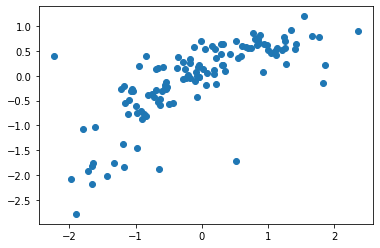

In [53]:
""" se imprime el resultado de la evaluación del modelo para verificar que se cargo correctamente """
plt.scatter(y_test,y_pred)# Visualización de resultados